In [163]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# To Plot matplotlib figures inline on the notebook
%matplotlib inline


from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV


#This is for displaying the tree (we shouldn't need these now)
#!pip install pydotplus
#!pip install GraphViz
#import pydotplus as pydot
#from IPython.display import Image
from sklearn.externals.six import StringIO

# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

In [164]:
datafile = 'ModelData1.csv'

df = pd.read_csv(datafile)
df

,Unnamed: 0,ID_num,Name,applicationCategory,OS_windows,OS_mac,OS_linux,SteamPlay,Release_Date,worstRating,bestRating,ratingValue,reviewCount,Price,Lowest_Price,Max_Sale,controller_support,metacritic_score,community_visible_stats,workshop_visible,releasestate,languages_num,community_hub_visible,owners,owners_unc,players_total,owners_played_percent,players_2_weeks,players_2_weeks_percent,median_total_playtime,average_total_playtime,Packages,DLCs,Depots,genre_Action,genre_Indie,genre_Strategy,genre_Simulation,genre_RPG,genre_Adventure,genre_Casual,genre_Early Access,genre_Racing,genre_Sports,genre_Free to Play,genre_Massively Multiplayer,owners_log
0,0,10,Counter-Strike,0,1,1,1,1,2000-11-01,0.0,100.0,97.74,93913.0,9.99,2.49,75.0,0,88.0,0,-1,-1,0,0,1.344e+07,96036.0,9.427e+06,70.13,361920.0,2.69,6.9,185.9,65,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,7.128
1,1,1002,Rag Doll Kung Fu,0,-1,-1,-1,0,2005-10-12,NaN,NaN,NaN,NaN,9.99,2.49,75.0,0,69.0,-1,-1,-1,0,0,3.935e+04,5282.0,1.188e+04,30.19,0.0,0.00,NaN,1.1,4,1,2.0,0,1,0,0,0,0,0,0,0,0,0,0,4.595
2,2,10090,Call of Duty: World at War,0,-1,-1,-1,0,2008-11-18,0.0,100.0,92.69,16971.0,19.99,9.79,51.0,0,83.0,0,-1,-1,0,0,1.674e+06,34382.0,1.424e+06,85.07,106163.0,6.34,12.5,42.1,41,0,7.0,1,0,0,0,0,0,0,0,0,0,0,0,6.224
3,3,10130,TimeShift,0,-1,-1,-1,0,2007-10-30,0.0,100.0,76.69,653.0,19.99,4.99,75.0,0,71.0,0,-1,-1,0,0,1.340e+05,9746.0,5.549e+04,41.41,1172.0,0.87,1.1,3.1,6,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,5.127
4,4,10180,Call of Duty: Modern Warfare 2,0,-1,-1,-1,0,2009-11-12,0.0,100.0,90.93,26992.0,19.99,9.79,51.0,0,86.0,0,-1,-1,8,0,5.246e+06,60607.0,4.687e+06,89.33,70157.0,1.34,9.4,23.5,37,0,18.0,1,0,0,0,0,0,0,0,0,0,0,0,6.720
5,5,10220,Postal 3,0,-1,-1,-1,0,2011-12-21,NaN,NaN,NaN,NaN,11.99,4.79,60.0,0,24.0,0,-1,-1,2,0,7.830e+04,8137.0,6.901e+04,88.14,2491.0,3.18,2.1,7.1,3,0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,4.894
6,6,102400,Vertex Dispenser,0,1,1,0,1,2011-06-10,NaN,NaN,NaN,NaN,9.99,4.99,50.0,0,70.0,0,-1,-1,0,0,3.304e+04,4840.0,1.299e+04,39.33,0.0,0.00,NaN,NaN,5,1,2.0,1,1,1,0,0,0,0,0,0,0,0,0,4.519
7,7,10250,PT Boats: Knights of the Sea,0,-1,-1,-1,0,2009-01-30,NaN,NaN,NaN,NaN,6.99,2.49,75.0,0,NaN,-1,-1,-1,0,0,1.151e+04,2856.0,9.837e+03,85.49,0.0,0.00,1.4,2.7,4,0,3.0,0,0,0,1,0,0,0,0,0,0,0,0,4.061
8,8,102500,Kingdoms of Amalur: Reckoning™,0,-1,-1,-1,0,2012-02-07,0.0,100.0,87.28,7748.0,19.99,4.39,78.0,3,81.0,0,-1,-1,5,0,8.919e+05,27437.0,7.470e+05,83.76,19465.0,2.18,9.2,26.6,6,4,13.0,1,0,0,0,1,0,0,0,0,0,0,0,5.950
9,9,10260,PT Boats: South Gambit,0,-1,-1,-1,0,2010-12-10,NaN,NaN,NaN,NaN,6.99,2.49,75.0,0,NaN,-1,-1,-1,0,0,1.132e+04,2833.0,6.867e+03,60.65,0.0,0.00,NaN,2.0,4,0,3.0,0,0,0,1,0,0,0,0,0,0,0,0,4.054


In [165]:
#convert Release_Date column to a datetime object
from dateutil.parser import *

def toDT(d):
    #print(d)
    if d == np.nan or d == 'nan': return np.nan
    try:
        date = parse(d)
        return date.timestamp()
    except (ValueError,TypeError):
        print("unparsable data:",d)
        return np.nan

df['Release_Date'] = df['Release_Date'].map(toDT)
df.head()
#note, can't re-run this without the code above, as it changes data in place

unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable da

,Unnamed: 0,ID_num,Name,applicationCategory,OS_windows,OS_mac,OS_linux,SteamPlay,Release_Date,worstRating,bestRating,ratingValue,reviewCount,Price,Lowest_Price,Max_Sale,controller_support,metacritic_score,community_visible_stats,workshop_visible,releasestate,languages_num,community_hub_visible,owners,owners_unc,players_total,owners_played_percent,players_2_weeks,players_2_weeks_percent,median_total_playtime,average_total_playtime,Packages,DLCs,Depots,genre_Action,genre_Indie,genre_Strategy,genre_Simulation,genre_RPG,genre_Adventure,genre_Casual,genre_Early Access,genre_Racing,genre_Sports,genre_Free to Play,genre_Massively Multiplayer,owners_log
0,0,10,Counter-Strike,0,1,1,1,1,9.731e+08,0.0,100.0,97.74,93913.0,9.99,2.49,75.0,0,88.0,0,-1,-1,0,0,1.344e+07,96036.0,9.427e+06,70.13,361920.0,2.69,6.9,185.9,65,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,7.128
1,1,1002,Rag Doll Kung Fu,0,-1,-1,-1,0,1.129e+09,NaN,NaN,NaN,NaN,9.99,2.49,75.0,0,69.0,-1,-1,-1,0,0,3.935e+04,5282.0,1.188e+04,30.19,0.0,0.00,NaN,1.1,4,1,2.0,0,1,0,0,0,0,0,0,0,0,0,0,4.595
2,2,10090,Call of Duty: World at War,0,-1,-1,-1,0,1.227e+09,0.0,100.0,92.69,16971.0,19.99,9.79,51.0,0,83.0,0,-1,-1,0,0,1.674e+06,34382.0,1.424e+06,85.07,106163.0,6.34,12.5,42.1,41,0,7.0,1,0,0,0,0,0,0,0,0,0,0,0,6.224
3,3,10130,TimeShift,0,-1,-1,-1,0,1.194e+09,0.0,100.0,76.69,653.0,19.99,4.99,75.0,0,71.0,0,-1,-1,0,0,1.340e+05,9746.0,5.549e+04,41.41,1172.0,0.87,1.1,3.1,6,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,5.127
4,4,10180,Call of Duty: Modern Warfare 2,0,-1,-1,-1,0,1.258e+09,0.0,100.0,90.93,26992.0,19.99,9.79,51.0,0,86.0,0,-1,-1,8,0,5.246e+06,60607.0,4.687e+06,89.33,70157.0,1.34,9.4,23.5,37,0,18.0,1,0,0,0,0,0,0,0,0,0,0,0,6.720


In [166]:
df.Release_Date

0       9.731e+08
1       1.129e+09
2       1.227e+09
3       1.194e+09
4       1.258e+09
5       1.324e+09
6       1.308e+09
7       1.233e+09
8       1.329e+09
9       1.292e+09
10      1.318e+09
11      1.392e+09
          ...    
6986    1.237e+09
6987    1.306e+09
6988    1.252e+09
6989    1.311e+09
6990    1.265e+09
6991    1.309e+09
6992    1.304e+09
6993    1.297e+09
6994    1.320e+09
6995    1.285e+09
6996    1.308e+09
6997    1.315e+09
Name: Release_Date, Length: 6998, dtype: float64

In [167]:
#filter filter out free and price errored games, and set all NaN to -1

df = df.fillna(value=-1)
df = df.loc[df['Price'] >= 0,:]
df

,Unnamed: 0,ID_num,Name,applicationCategory,OS_windows,OS_mac,OS_linux,SteamPlay,Release_Date,worstRating,bestRating,ratingValue,reviewCount,Price,Lowest_Price,Max_Sale,controller_support,metacritic_score,community_visible_stats,workshop_visible,releasestate,languages_num,community_hub_visible,owners,owners_unc,players_total,owners_played_percent,players_2_weeks,players_2_weeks_percent,median_total_playtime,average_total_playtime,Packages,DLCs,Depots,genre_Action,genre_Indie,genre_Strategy,genre_Simulation,genre_RPG,genre_Adventure,genre_Casual,genre_Early Access,genre_Racing,genre_Sports,genre_Free to Play,genre_Massively Multiplayer,owners_log
0,0,10,Counter-Strike,0,1,1,1,1,9.731e+08,0.0,100.0,97.74,93913.0,9.99,2.49,75.0,0,88.0,0,-1,-1,0,0,1.344e+07,96036.0,9.427e+06,70.13,361920.0,2.69,6.9,185.9,65,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,7.128
1,1,1002,Rag Doll Kung Fu,0,-1,-1,-1,0,1.129e+09,-1.0,-1.0,-1.00,-1.0,9.99,2.49,75.0,0,69.0,-1,-1,-1,0,0,3.935e+04,5282.0,1.188e+04,30.19,0.0,0.00,-1.0,1.1,4,1,2.0,0,1,0,0,0,0,0,0,0,0,0,0,4.595
2,2,10090,Call of Duty: World at War,0,-1,-1,-1,0,1.227e+09,0.0,100.0,92.69,16971.0,19.99,9.79,51.0,0,83.0,0,-1,-1,0,0,1.674e+06,34382.0,1.424e+06,85.07,106163.0,6.34,12.5,42.1,41,0,7.0,1,0,0,0,0,0,0,0,0,0,0,0,6.224
3,3,10130,TimeShift,0,-1,-1,-1,0,1.194e+09,0.0,100.0,76.69,653.0,19.99,4.99,75.0,0,71.0,0,-1,-1,0,0,1.340e+05,9746.0,5.549e+04,41.41,1172.0,0.87,1.1,3.1,6,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,5.127
4,4,10180,Call of Duty: Modern Warfare 2,0,-1,-1,-1,0,1.258e+09,0.0,100.0,90.93,26992.0,19.99,9.79,51.0,0,86.0,0,-1,-1,8,0,5.246e+06,60607.0,4.687e+06,89.33,70157.0,1.34,9.4,23.5,37,0,18.0,1,0,0,0,0,0,0,0,0,0,0,0,6.720
5,5,10220,Postal 3,0,-1,-1,-1,0,1.324e+09,-1.0,-1.0,-1.00,-1.0,11.99,4.79,60.0,0,24.0,0,-1,-1,2,0,7.830e+04,8137.0,6.901e+04,88.14,2491.0,3.18,2.1,7.1,3,0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,4.894
6,6,102400,Vertex Dispenser,0,1,1,0,1,1.308e+09,-1.0,-1.0,-1.00,-1.0,9.99,4.99,50.0,0,70.0,0,-1,-1,0,0,3.304e+04,4840.0,1.299e+04,39.33,0.0,0.00,-1.0,-1.0,5,1,2.0,1,1,1,0,0,0,0,0,0,0,0,0,4.519
7,7,10250,PT Boats: Knights of the Sea,0,-1,-1,-1,0,1.233e+09,-1.0,-1.0,-1.00,-1.0,6.99,2.49,75.0,0,-1.0,-1,-1,-1,0,0,1.151e+04,2856.0,9.837e+03,85.49,0.0,0.00,1.4,2.7,4,0,3.0,0,0,0,1,0,0,0,0,0,0,0,0,4.061
8,8,102500,Kingdoms of Amalur: Reckoning™,0,-1,-1,-1,0,1.329e+09,0.0,100.0,87.28,7748.0,19.99,4.39,78.0,3,81.0,0,-1,-1,5,0,8.919e+05,27437.0,7.470e+05,83.76,19465.0,2.18,9.2,26.6,6,4,13.0,1,0,0,0,1,0,0,0,0,0,0,0,5.950
9,9,10260,PT Boats: South Gambit,0,-1,-1,-1,0,1.292e+09,-1.0,-1.0,-1.00,-1.0,6.99,2.49,75.0,0,-1.0,-1,-1,-1,0,0,1.132e+04,2833.0,6.867e+03,60.65,0.0,0.00,-1.0,2.0,4,0,3.0,0,0,0,1,0,0,0,0,0,0,0,0,4.054


# Separating features and target variables

In [168]:
df.columns

Index(['Unnamed: 0', 'ID_num', 'Name', 'applicationCategory', 'OS_windows',
       'OS_mac', 'OS_linux', 'SteamPlay', 'Release_Date', 'worstRating',
       'bestRating', 'ratingValue', 'reviewCount', 'Price', 'Lowest_Price',
       'Max_Sale', 'controller_support', 'metacritic_score',
       'community_visible_stats', 'workshop_visible', 'releasestate',
       'languages_num', 'community_hub_visible', 'owners', 'owners_unc',
       'players_total', 'owners_played_percent', 'players_2_weeks',
       'players_2_weeks_percent', 'median_total_playtime',
       'average_total_playtime', 'Packages', 'DLCs', 'Depots', 'genre_Action',
       'genre_Indie', 'genre_Strategy', 'genre_Simulation', 'genre_RPG',
       'genre_Adventure', 'genre_Casual', 'genre_Early Access', 'genre_Racing',
       'genre_Sports', 'genre_Free to Play', 'genre_Massively Multiplayer',
       'owners_log'],
      dtype='object')

In [169]:
feature_columns = ['OS_windows', 'OS_mac',
       'OS_linux', 'SteamPlay', 'Release_Date', 'worstRating', 'bestRating',
       'ratingValue', 'reviewCount', 'Max_Sale',
       'controller_support', 'metacritic_score', 'community_visible_stats',
       'workshop_visible', 'releasestate', 'languages_num',
       'community_hub_visible', 'owners', 'owners_unc', 'players_total',
       'owners_played_percent', 'players_2_weeks', 'players_2_weeks_percent',
       'median_total_playtime', 'average_total_playtime', 'Packages', 'DLCs',
       'Depots', 'genre_Action', 'genre_RPG', 'genre_Indie', 'genre_Strategy',
       'genre_Adventure', 'genre_Simulation', 'genre_Casual',
       'genre_Early Access', 'genre_Racing', 'genre_Free to Play',
       'genre_Sports', 'genre_Massively Multiplayer']

"""removed columns, due to 'cheating' correlation with price
'Price', 'Lowest_Price', 

"""
target = 'Price'

y = df.loc[:,"Price"]
X = df.loc[:,feature_columns]

In [170]:
#Split the data 70-30 train/test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [171]:
len(feature_columns)

40

## Initial Looks

In [172]:
"""df_subset = df.loc[:,['Release_Date', 'ratingValue',
       'Price', 
       'metacritic_score',
       'owners_played_percent',
       'average_total_playtime', 'Packages', 'DLCs', 'Depots']]
sns.pairplot(df_subset)"""

"df_subset = df.loc[:,['Release_Date', 'ratingValue',\n       'Price', \n       'metacritic_score',\n       'owners_played_percent',\n       'average_total_playtime', 'Packages', 'DLCs', 'Depots']]\nsns.pairplot(df_subset)"

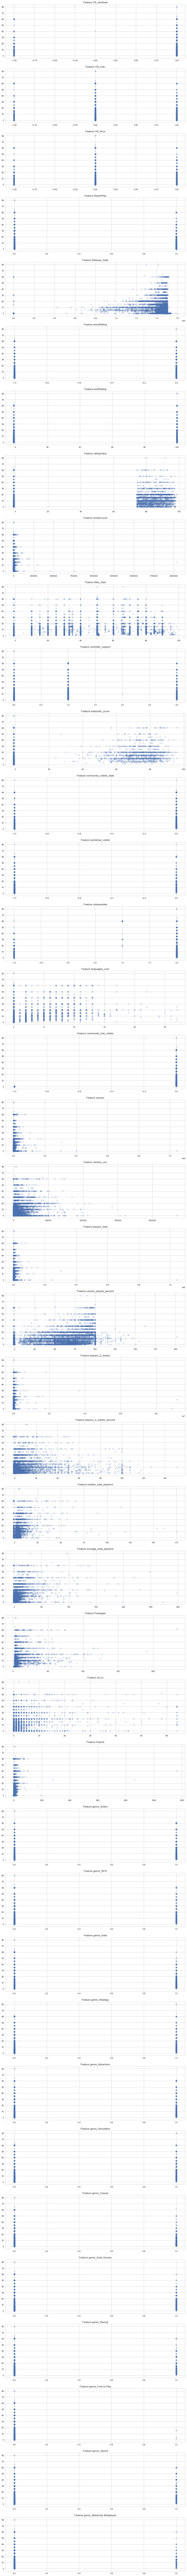

In [173]:
fig,ax = plt.subplots(ncols=1,nrows=len(X.columns),figsize=(15, 220))

for i,feature in enumerate(X):
    ax[i].scatter(X[feature],y,alpha=.2)
    ax[i].set_title("Feature "+str(feature))

In [174]:
#from owners
"""('OS_windows', 0.0),
 ('OS_mac', 0.0),
 ('OS_linux', 0.0),
 ('SteamPlay', 0.0),
 ('Release_Date', -0.0003126391802476204),
 ('worstRating', -0.0),
 ('bestRating', -1567.3410435531523),
 ('ratingValue', 3593.9072708554922),
 ('Price', -0.0),
 ('Lowest_Price', -2081.2772418718241),
 ('Max_Sale', 1499.3564564871849),
 ('controller_support', 0.0),
 ('metacritic_score', 2105.4334582222991),
 ('community_visible_stats', 0.0),
 ('workshop_visible', 0.0),
 ('releasestate', -0.0),
 ('languages_num', 0.0),
 ('community_hub_visible', 0.0),
 ('owners_played_percent', 0.0),
 ('players_2_weeks_percent', -1.7373146986772761),
 ('median_total_playtime', -0.0),
 ('average_total_playtime', 6063.7059692453195),
 ('Packages', 22882.046944052454),
 ('DLCs', -0.0),
 ('Depots', -885.06284036310183),"""

"('OS_windows', 0.0),\n ('OS_mac', 0.0),\n ('OS_linux', 0.0),\n ('SteamPlay', 0.0),\n ('Release_Date', -0.0003126391802476204),\n ('worstRating', -0.0),\n ('bestRating', -1567.3410435531523),\n ('ratingValue', 3593.9072708554922),\n ('Price', -0.0),\n ('Lowest_Price', -2081.2772418718241),\n ('Max_Sale', 1499.3564564871849),\n ('controller_support', 0.0),\n ('metacritic_score', 2105.4334582222991),\n ('community_visible_stats', 0.0),\n ('workshop_visible', 0.0),\n ('releasestate', -0.0),\n ('languages_num', 0.0),\n ('community_hub_visible', 0.0),\n ('owners_played_percent', 0.0),\n ('players_2_weeks_percent', -1.7373146986772761),\n ('median_total_playtime', -0.0),\n ('average_total_playtime', 6063.7059692453195),\n ('Packages', 22882.046944052454),\n ('DLCs', -0.0),\n ('Depots', -885.06284036310183),"

## A closer look at a few of the more interesting features

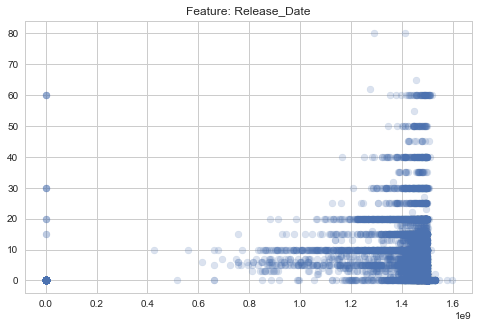

In [175]:
feature = 'Release_Date'
plt.figure(figsize=(8, 5))
plt.title("Feature: "+str(feature))
plt.scatter(X[feature],y,alpha=.2);

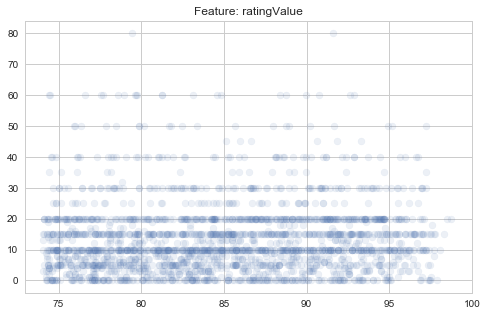

In [182]:
feature = 'ratingValue'
fig, ax =  plt.subplots(figsize=(8, 5))
#ax.set_ylim(100,5e7)

ax.set_xlim(73,100)

ax.set_title("Feature: "+str(feature))
ax.scatter(X[feature],y,alpha=.1);

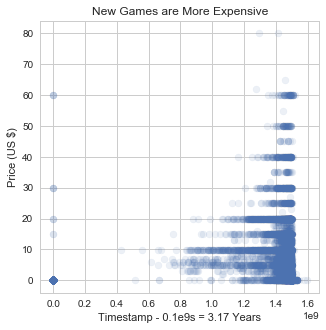

In [185]:
feature = 'Release_Date'
fig, ax =  plt.subplots(figsize=(5, 5))
#ax.set_ylim(100,5e7)

ax.set_title("New Games are More Expensive")
ax.set_ylabel("Price (US $)")
ax.set_xlabel("Timestamp - 0.1e9s = 3.17 Years")
ax.scatter(X[feature],y,alpha=.1);

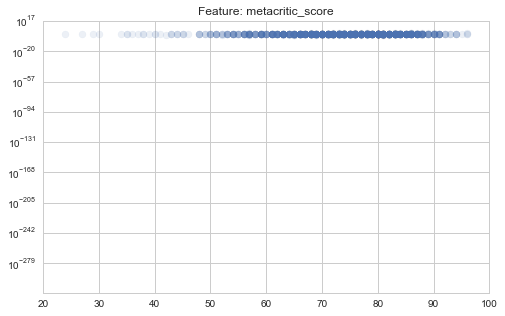

In [178]:
feature = 'metacritic_score'
fig, ax =  plt.subplots(figsize=(8, 5))
#ax.set_ylim(100,5e7)
ax.set_yscale('log')
ax.set_xlim(20,100)
ax.set_title("Feature: "+str(feature))
ax.scatter(X[feature],y,alpha=.1);

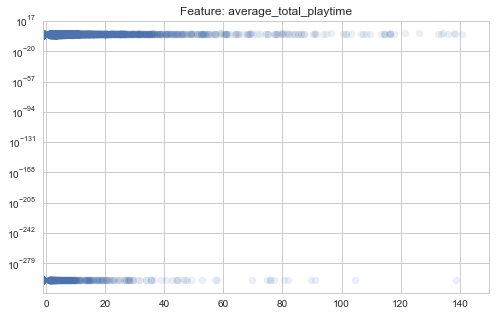

In [179]:
feature = 'average_total_playtime'
fig, ax =  plt.subplots(figsize=(8, 5))

#ax.set_ylim(100,5e7)
ax.set_yscale('log')

ax.set_xlim(-1,150)

ax.set_title("Feature: "+str(feature))
ax.scatter(X[feature],y,alpha=.1);

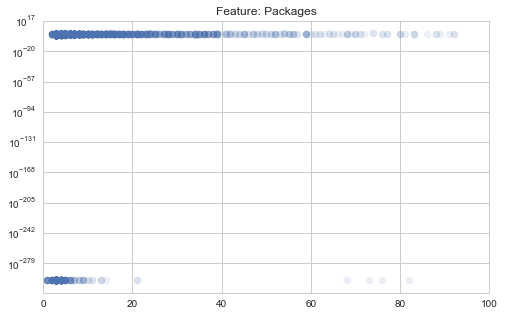

In [180]:
feature = 'Packages'
fig, ax =  plt.subplots(figsize=(8, 5))
#ax.set_ylim(100,5e7)
ax.set_yscale('log')
ax.set_xlim(0,100)
ax.set_title("Feature: "+str(feature))
ax.scatter(X[feature],y,alpha=.1);

## and for the features I determined were 'cheating' due to being caused by the target

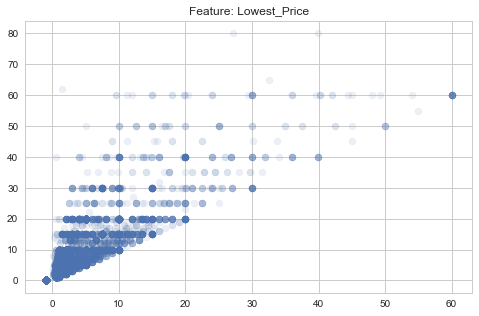

In [181]:
feature = 'Lowest_Price'
fig, ax =  plt.subplots(figsize=(8, 5))
ax.set_title("Feature: "+str(feature))
ax.scatter(df[feature],y,alpha=.1);

In [88]:
df.describe()

,Unnamed: 0,ID_num,applicationCategory,OS_windows,OS_mac,OS_linux,SteamPlay,Release_Date,worstRating,bestRating,ratingValue,reviewCount,Price,Lowest_Price,Max_Sale,controller_support,metacritic_score,community_visible_stats,workshop_visible,releasestate,languages_num,community_hub_visible,owners,owners_unc,players_total,owners_played_percent,players_2_weeks,players_2_weeks_percent,median_total_playtime,average_total_playtime,Packages,DLCs,Depots,genre_Action,genre_Indie,genre_Strategy,genre_Simulation,genre_RPG,genre_Adventure,genre_Casual,genre_Early Access,genre_Racing,genre_Sports,genre_Free to Play,genre_Massively Multiplayer,owners_log
count,6566.00,6566.000,6566.0,6566.000,6566.000,6566.000,6566.000,6.566e+03,6566.000,6566.000,6566.000,6.566e+03,6566.000,6566.000,6566.000,6566.000,6566.000,6566.000,6566.000,6566.000,6566.000,6566.000,6.566e+03,6566.000,6.566e+03,6566.000,6.566e+03,6566.000,6566.000,6566.000,6566.000,6566.000,6566.000,6566.000,6566.000,6566.000,6566.000,6566.000,6566.000,6566.000,6566.000,6566.000,6566.000,6.566e+03,6566.000,6566.000
mean,3494.28,405143.194,0.0,0.816,0.264,0.162,0.378,1.358e+09,-0.658,33.518,28.385,2.015e+03,10.105,4.530,41.983,0.691,13.970,-0.422,-0.940,1.034,1.315,-0.206,2.660e+05,7385.629,1.852e+05,51.478,1.284e+04,6.670,2.590,6.818,6.471,1.755,4.471,0.407,0.512,0.194,0.159,0.140,0.260,0.184,0.127,0.044,0.053,6.092e-04,0.018,3.312
std,2014.54,175862.832,0.0,0.578,0.615,0.565,0.485,3.141e+08,0.474,47.908,40.956,2.891e+04,10.698,6.871,32.757,1.068,30.226,0.494,0.237,1.399,3.176,0.405,1.721e+06,11834.253,1.588e+06,35.769,1.754e+05,15.416,7.289,16.184,10.991,5.656,19.543,0.491,0.500,0.395,0.366,0.347,0.439,0.388,0.333,0.205,0.224,2.468e-02,0.134,2.434
min,0.00,10.000,0.0,-1.000,-1.000,-1.000,0.000,-1.000e+00,-1.000,-1.000,-1.000,-1.000e+00,0.000,-1.000,-1.000,0.000,-1.000,-1.000,-1.000,-1.000,0.000,-1.000,-1.000e+00,-1.000,-1.000e+00,-1.000,-1.000e+00,-1.000,-1.000,-1.000,1.000,0.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,-1.000
25%,1750.25,299690.000,0.0,1.000,0.000,0.000,0.000,1.398e+09,-1.000,-1.000,-1.000,-1.000e+00,1.990,0.500,-1.000,0.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,6.640e+02,962.000,5.820e+02,13.738,0.000e+00,0.000,-1.000,-1.000,3.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,2.822
50%,3504.50,416525.000,0.0,1.000,0.000,0.000,0.000,1.461e+09,-1.000,-1.000,-1.000,-1.000e+00,7.990,2.490,50.000,0.000,-1.000,0.000,-1.000,2.000,0.000,0.000,1.169e+04,2996.000,6.867e+03,59.990,5.860e+02,0.880,1.500,2.900,3.000,0.000,3.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,4.068
75%,5219.75,545317.500,0.0,1.000,1.000,1.000,1.000,1.488e+09,0.000,100.000,79.840,2.290e+02,14.990,6.290,75.000,1.000,-1.000,0.000,-1.000,2.000,0.000,0.000,1.135e+05,9396.000,6.503e+04,80.560,2.433e+03,6.170,3.500,6.800,5.000,1.000,5.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,5.055
max,6997.00,678620.000,0.0,1.000,1.000,1.000,1.000,1.595e+09,0.000,100.000,98.720,2.041e+06,79.990,59.990,99.000,3.000,96.000,0.000,0.000,2.000,27.000,0.000,1.045e+08,235425.000,1.044e+08,201.660,9.164e+06,151.190,175.500,298.000,234.000,64.000,1165.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000e+00,1.000,8.019


# Trying a simple tree model

In [89]:
## To start, we will build a single tree
from sklearn import tree

# Set some (starting) parameters
#dtrmodel = tree.DecisionTreeRegressor(min_samples_split=10, max_depth=4)
dtrmodel = tree.DecisionTreeRegressor(min_samples_split=10, max_depth=6, min_samples_leaf=8)

# Fit the model to some training data
dtrmodel.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=8, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [90]:
# Export the structure of the tree to a file

tree.export_graphviz(dtrmodel, out_file='tree.dot',feature_names = X_train.columns)

In [91]:
# Look at the file (using ! for a command line access)

!head tree.dot

digraph Tree {
node [shape=box] ;
0 [label="community_hub_visible <= -0.5\nmse = 113.9208\nsamples = 4596\nvalue = 10.1025"] ;
1 [label="mse = 0.0\nsamples = 922\nvalue = 0.0"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="average_total_playtime <= 7.85\nmse = 110.4698\nsamples = 3674\nvalue = 12.6377"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="Depots <= 0.0\nmse = 54.9351\nsamples = 2764\nvalue = 9.7678"] ;
2 -> 3 ;
4 [label="Release_Date <= 1503514880.0\nmse = 314.8789\nsamples = 17\nvalue = 42.0488"] ;


# Now:
# 1) Open a new browser tab and go to http://webgraphviz.com 
# 2) Open the tree.dot file as a text file
# 3) Copy and Paste the text of the file into the webpage

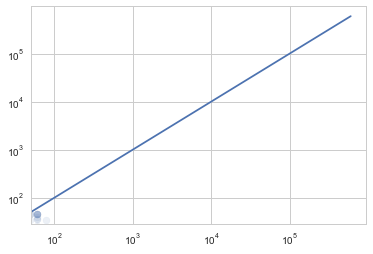

In [92]:
tree_pred_test = dtrmodel.predict(X_test)
plt.scatter(y_test, tree_pred_test,alpha=.1)
plt.xscale('log')
plt.yscale('log')
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000));


In [93]:
# Root Mean Square Error
np.sqrt(np.mean((tree_pred_test - y_test)**2))

7.3039539842478023

In [94]:
r2_score(y_test, tree_pred_test)

0.53859252669457658

# Random Forrest

In [95]:
from sklearn.ensemble import RandomForestRegressor

In [96]:
# Initialize the model, then fit it on the training data

#this test run uses the parameters from the RealEstate date as a starting point
rfmodel1 = RandomForestRegressor(n_estimators = 500, min_samples_leaf=5, max_features=4, n_jobs=-1)
rfmodel1.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [97]:
# Use the trained model to predict the results on the test set

rf1_test_pred = rfmodel1.predict(X_test)

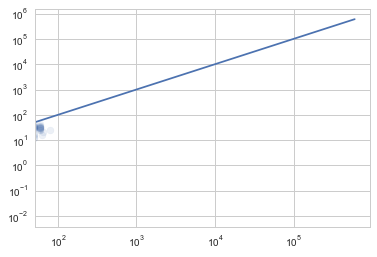

In [98]:
#Plot actual vs predicted
plt.scatter(y_test, rf1_test_pred,alpha=.1)
plt.xscale('log')
plt.yscale('log')
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000))



In [99]:
# Root Mean Square Error 
np.sqrt(np.mean((rf1_test_pred - y_test)**2))

6.5616854034530583

In [100]:
#R squared score
r2_score(y_test, rf1_test_pred)

0.62760882828424003

In [101]:
#look at the importance of each parameter:
coefs = rfmodel1.fit(X,y).feature_importances_   #note, run on whole dataset, not just X_train,y_train
sorted(zip(X.columns,coefs), key = lambda x:x[1], reverse=True)

[('average_total_playtime', 0.10050121325277582),
 ('median_total_playtime', 0.094088678742227566),
 ('community_hub_visible', 0.082831140569091979),
 ('Max_Sale', 0.061168147240159905),
 ('Depots', 0.058203139007215937),
 ('Packages', 0.05606809965801747),
 ('releasestate', 0.05198417777999275),
 ('owners_played_percent', 0.047502851355538847),
 ('languages_num', 0.043674326680641841),
 ('DLCs', 0.038343656471210692),
 ('Release_Date', 0.038100562265773547),
 ('players_2_weeks_percent', 0.031836863075018512),
 ('genre_Indie', 0.03038722884597372),
 ('metacritic_score', 0.028645450179938702),
 ('players_2_weeks', 0.027377376241909428),
 ('players_total', 0.026235907039543295),
 ('community_visible_stats', 0.023872995329113442),
 ('owners', 0.023109459874294351),
 ('owners_unc', 0.022295860237023058),
 ('controller_support', 0.015272229016278838),
 ('genre_Casual', 0.012192771569746873),
 ('reviewCount', 0.01189342071625236),
 ('ratingValue', 0.010249241074853491),
 ('genre_Action', 0.0

0.64904445221


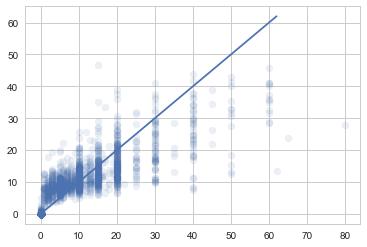

In [102]:
rfmodel1 = RandomForestRegressor(n_estimators = 100, min_samples_leaf=5,\
           max_features=9, n_jobs=-1, bootstrap=True)
rfmodel1.fit(X_train,y_train)
rf1_test_pred = rfmodel1.predict(X_test)

print(r2_score(y_test, rf1_test_pred))

plt.scatter(y_test, rf1_test_pred,alpha=.1)
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(100,1e7)
#plt.ylim(100,1e7)
plt.plot(np.linspace(0,62,1000),np.linspace(0,62,1000));

# Gradient Boosted Tree (best so far)

In [103]:
from sklearn.ensemble import GradientBoostingRegressor

In [104]:
gbmodel1 = GradientBoostingRegressor(subsample=0.8, learning_rate=0.11,\
                max_depth = 3,max_leaf_nodes=12,n_estimators=150,loss='huber',\
                min_samples_split=2)

In [105]:
gbmodel1.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.11, loss='huber', max_depth=3,
             max_features=None, max_leaf_nodes=12,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=150, presort='auto', random_state=None,
             subsample=0.8, verbose=0, warm_start=False)

In [106]:
gb1_test_pred = gbmodel1.predict(X_test)

0.643245704441


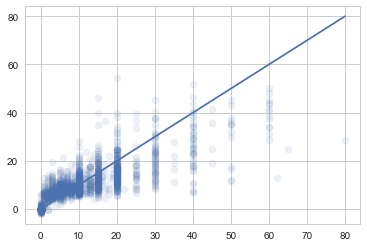

In [107]:
print(r2_score(y_test, gb1_test_pred))

plt.scatter(y_test, gb1_test_pred,alpha=.1)
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(100,1e7)
#plt.ylim(100,1e7)
plt.plot(np.linspace(0,80,1000),np.linspace(0,80,1000));

0.64266073409


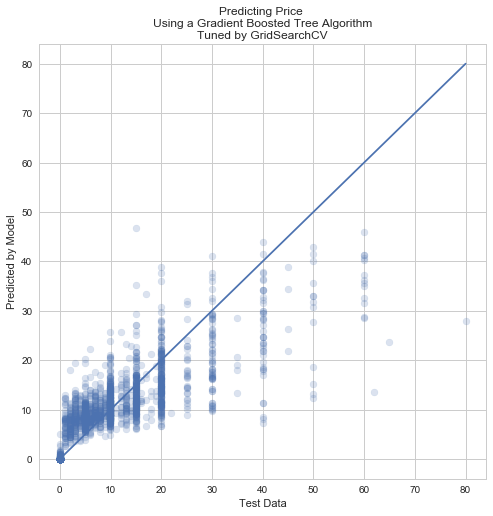

In [124]:
#try to tune this a little better (used the loops below)
gbmodel1 = GradientBoostingRegressor(subsample=0.85, learning_rate=0.12,\
            max_depth = 10,max_leaf_nodes=12,n_estimators=125,loss='huber',\
            min_samples_split=4 )
gbmodel1.fit(X_train,y_train)
gb1_test_pred = gbmodel1.predict(X_test)

print(r2_score(y_test, gb1_test_pred))

plt.figure(figsize=(8,8))
plt.scatter(y_test, rf1_test_pred,alpha=.2)

plt.xlabel("Test Data")
plt.ylabel("Predicted by Model")
plt.title("Predicting Price \nUsing a Gradient Boosted Tree Algorithm\nTuned by GridSearchCV")
plt.plot(np.linspace(0,80,1000),np.linspace(0,80,1000));

[  3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.]
3.0 0.648658358289
4.0 0.643178978972
5.0 0.651618875519
6.0 0.645627576336
7.0 0.640948893216
8.0 0.646662415574
9.0 0.646073523783
10.0 0.650399741239
11.0 0.641594072755
12.0 0.639261892767
13.0 0.640279191059
14.0 0.646073438137
15.0 0.637225632685


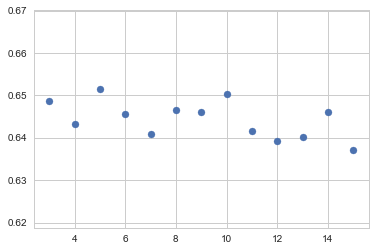

In [109]:
#searching for good tuning parameters
results = {}
space = np.linspace(3,15,13)
#space = [10,20,30,40,60,70,80,90,100,110,125,150,175,200]
print(space)
for i in space:
    gbmodel1 = GradientBoostingRegressor(subsample=0.85, learning_rate=0.12,\
                max_depth = 10,max_leaf_nodes=12,n_estimators=125,loss='huber',\
                min_samples_split=4 )
    gbmodel1.fit(X_train,y_train)
    gb1_test_pred = gbmodel1.predict(X_test)
    Rsq = r2_score(y_test, gb1_test_pred)
    print(i,Rsq)
    results[i]=Rsq
results
plt.scatter(list(results.keys()),list(results.values()))

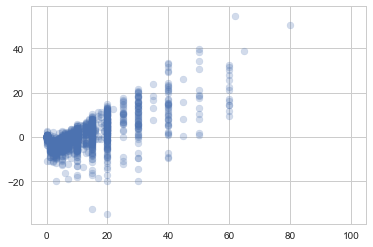

In [110]:
plt.scatter(y_test,y_test-gb1_test_pred,alpha=.25)
#plt.yscale('log')
#plt.xscale('log')
#plt.ylim(-1e6,1e6)
plt.plot(np.linspace(100,100,1000),np.linspace(0,0,1000))

In [111]:
gbmodel1.feature_importances_

array([ 0.00197214,  0.00628117,  0.00306212,  0.00618018,  0.10774739,
        0.        ,  0.        ,  0.03466216,  0.03076171,  0.05722069,
        0.02042096,  0.03292805,  0.00764406,  0.        ,  0.00339008,
        0.03712127,  0.05261823,  0.02859823,  0.0228199 ,  0.03863361,
        0.0725844 ,  0.04128747,  0.03199731,  0.06200745,  0.07832814,
        0.04916185,  0.04134321,  0.04499415,  0.00307228,  0.00455705,
        0.01557121,  0.0082069 ,  0.00633013,  0.01125729,  0.01426204,
        0.00908217,  0.00232096,  0.00206936,  0.00757591,  0.00192877])

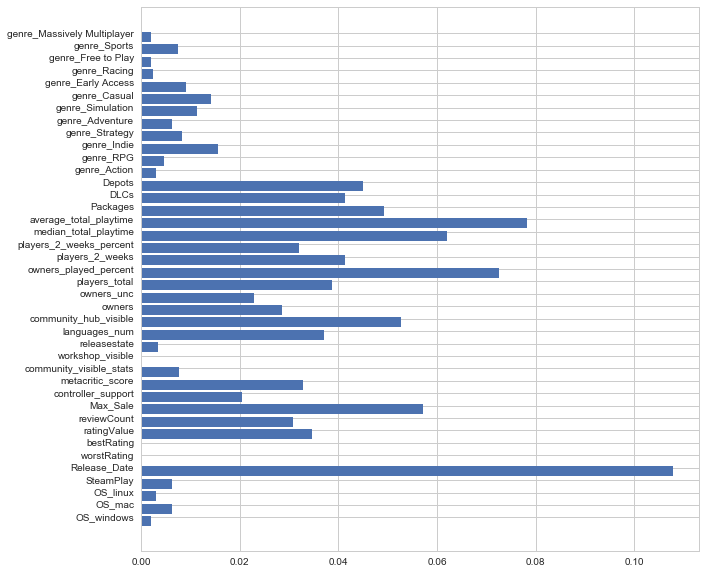

In [112]:
# Plot the "feature importances" given by the gb model - not super useful

fig, ax = plt.subplots(figsize=(10,10))

ind = np.array(range(len(X.columns)))+.7
plt.barh(ind,gbmodel1.feature_importances_);
ax.set_yticks(ind + .3);
ax.set_yticklabels((X_test.columns));

In [113]:
df.columns

Index(['Unnamed: 0', 'ID_num', 'Name', 'applicationCategory', 'OS_windows',
       'OS_mac', 'OS_linux', 'SteamPlay', 'Release_Date', 'worstRating',
       'bestRating', 'ratingValue', 'reviewCount', 'Price', 'Lowest_Price',
       'Max_Sale', 'controller_support', 'metacritic_score',
       'community_visible_stats', 'workshop_visible', 'releasestate',
       'languages_num', 'community_hub_visible', 'owners', 'owners_unc',
       'players_total', 'owners_played_percent', 'players_2_weeks',
       'players_2_weeks_percent', 'median_total_playtime',
       'average_total_playtime', 'Packages', 'DLCs', 'Depots', 'genre_Action',
       'genre_Indie', 'genre_Strategy', 'genre_Simulation', 'genre_RPG',
       'genre_Adventure', 'genre_Casual', 'genre_Early Access', 'genre_Racing',
       'genre_Sports', 'genre_Free to Play', 'genre_Massively Multiplayer',
       'owners_log'],
      dtype='object')

In [114]:
#only features with importances above 0.04
best_features = ['Release_Date',
       'ratingValue', 'Max_Sale',
       'languages_num',
       'players_total',
       'owners_played_percent', 'players_2_weeks_percent',
       'median_total_playtime', 'average_total_playtime', 'Packages', 'Depots']


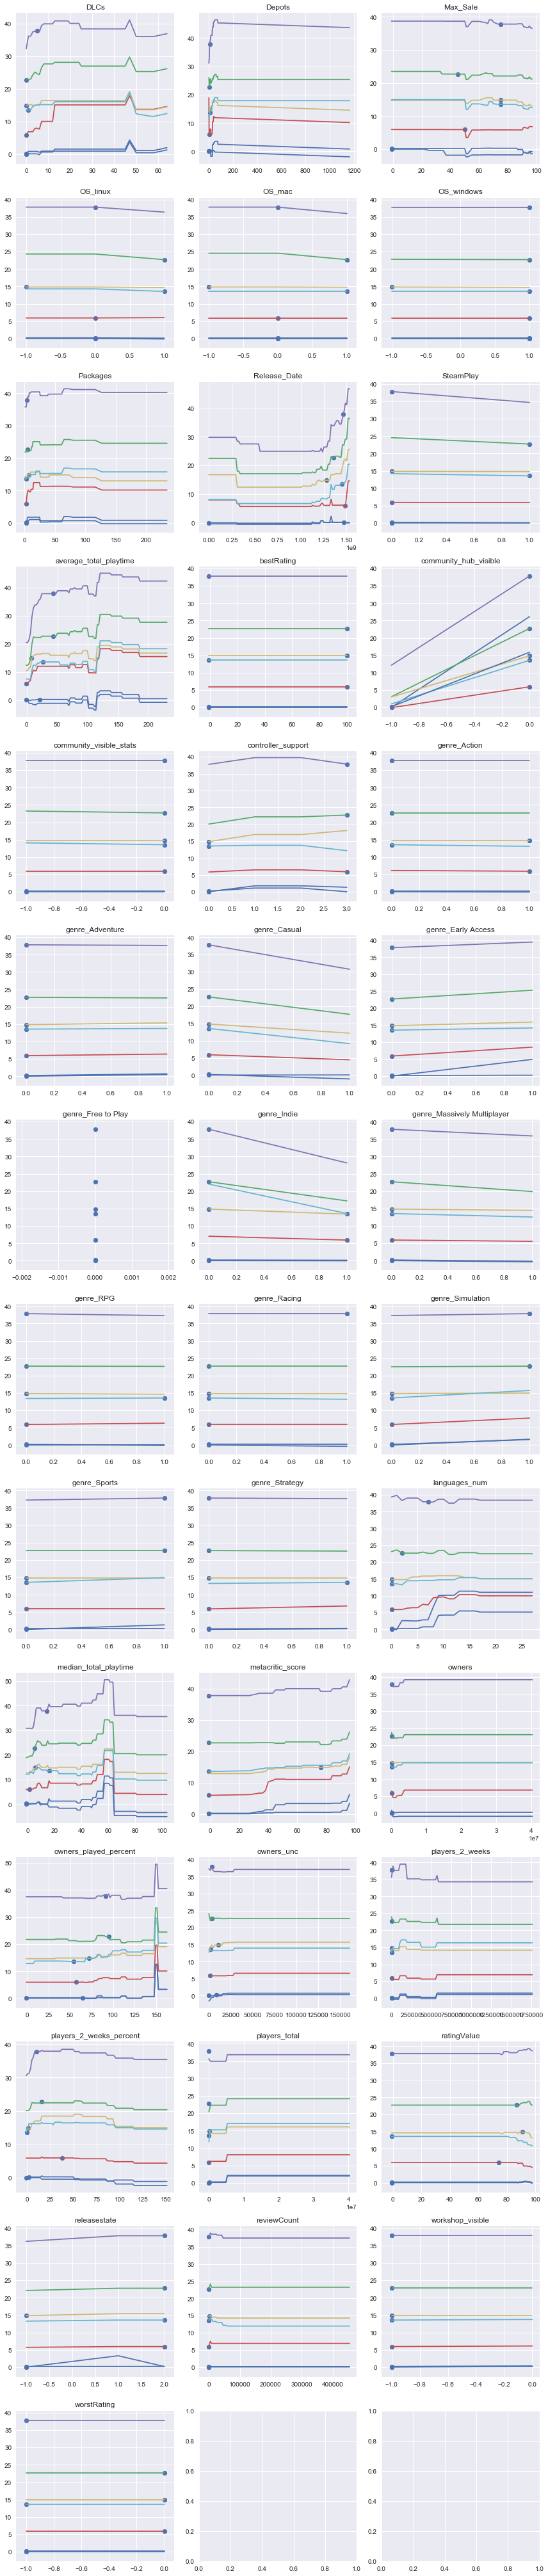

In [48]:
import ml_insights as mli
mxr = mli.ModelXRay(gbmodel1,X_test)
indices = mxr.feature_dependence_plots(num_pts=7)

# Trying out the LASSO

## Gradient Descent Algorithm

In [49]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV

In [50]:
lr_model2 = LinearRegression()
lr_model2.fit(X_train.loc[:,feature_columns],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
list(zip(feature_columns,lr_model2.coef_))

[('OS_windows', -0.029211129919812784),
 ('OS_mac', 0.44755187801217977),
 ('OS_linux', -0.16576678407789777),
 ('SteamPlay', -0.98376501347431244),
 ('Release_Date', -2.0182742139335762e-10),
 ('worstRating', 0.00014536362471557736),
 ('bestRating', 0.014681733894938634),
 ('ratingValue', -0.0091718724791466245),
 ('reviewCount', -3.9579240864895393e-05),
 ('Max_Sale', -0.03934154266833071),
 ('controller_support', 0.39926239937215541),
 ('metacritic_score', 0.053093095865814198),
 ('community_visible_stats', 0.72317692847540305),
 ('workshop_visible', 1.5706971931745495),
 ('releasestate', 1.1781336666076658),
 ('languages_num', 0.46185201620607702),
 ('community_hub_visible', 10.784293699431613),
 ('owners', -1.2162898466172578e-07),
 ('owners_unc', -2.7603984853699637e-05),
 ('players_total', -2.0472758710532446e-07),
 ('owners_played_percent', 0.018029751285663087),
 ('players_2_weeks', 4.6544394161768254e-06),
 ('players_2_weeks_percent', -0.011699174695265591),
 ('median_total_p

In [52]:
GD_test_set_prediction = lr_model2.predict(X_test.loc[:,feature_columns])

In [53]:
#R^2 score
r2_score(y_test, GD_test_set_prediction)

0.51017221896999609

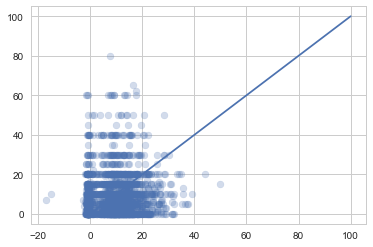

In [125]:
plt.scatter(GD_test_set_prediction,y_test,alpha=.25)
#plt.yscale('log')
#plt.xscale('log')
plt.plot(np.linspace(1,100,1000),np.linspace(1,100,1000))

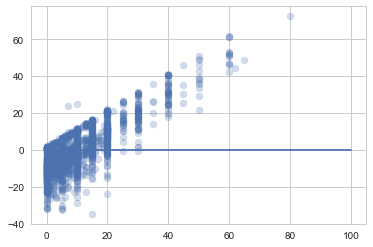

In [126]:
plt.scatter(y_test,y_test-GD_test_set_prediction,alpha=.25)
#plt.yscale('log')
#plt.xscale('log')
#plt.ylim(-1e6,1e6)
plt.plot(np.linspace(1,100,1000),np.linspace(0,0,1000))

In [158]:
#LASSO!!
LinearRegression_2 = Lasso(alpha = 40)
LinearRegression_2.fit(X_train.loc[:,feature_columns],y_train)


Lasso(alpha=40, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [159]:
list(zip(feature_columns,LinearRegression_2.coef_))

[('OS_windows', -0.0),
 ('OS_mac', -0.0),
 ('OS_linux', -0.0),
 ('SteamPlay', -0.0),
 ('Release_Date', 3.8461366071994672e-09),
 ('worstRating', 0.0),
 ('bestRating', 0.0),
 ('ratingValue', 0.0),
 ('reviewCount', 1.7256025792285369e-06),
 ('Max_Sale', 0.012306735910349918),
 ('controller_support', 0.0),
 ('metacritic_score', 0.047145309836421463),
 ('community_visible_stats', 0.0),
 ('workshop_visible', 0.0),
 ('releasestate', 0.0),
 ('languages_num', 0.0),
 ('community_hub_visible', 0.0),
 ('owners', -2.5773976466264768e-06),
 ('owners_unc', 0.00017165189512078119),
 ('players_total', 1.0852967913092502e-06),
 ('owners_played_percent', 0.044513205473044742),
 ('players_2_weeks', 1.1928306588134507e-05),
 ('players_2_weeks_percent', 0.0),
 ('median_total_playtime', 0.0),
 ('average_total_playtime', 0.001384527503931613),
 ('Packages', 0.0),
 ('DLCs', 0.0),
 ('Depots', 0.0),
 ('genre_Action', 0.0),
 ('genre_RPG', 0.0),
 ('genre_Indie', -0.0),
 ('genre_Strategy', 0.0),
 ('genre_Adventure

In [160]:
LinearRegression_2_pred = LinearRegression_2.predict(X_test.loc[:,feature_columns])

0.162497974846


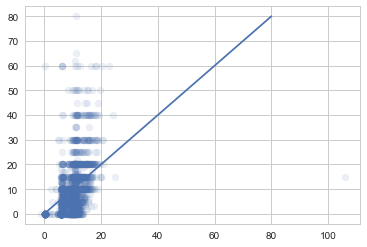

In [161]:
print(r2_score(y_test, LinearRegression_2_pred))

plt.scatter(LinearRegression_2_pred,y_test,alpha=.1)
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(100,1e7)
#plt.ylim(100,1e7)
plt.plot(np.linspace(0,80,1000),np.linspace(0,80,1000));

## trying out Andrew's Cross-Validation

In [147]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
#std.fit(X_train.values.astype(float))
std.fit(X_train)



StandardScaler(copy=True, with_mean=True, with_std=True)

In [148]:
# This next block of code will run a cross-validation

alphalist = 10**(np.linspace(-3,6,200))#linspace(-3,4,200))
err_vec_test = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    steps = [('standardize', StandardScaler()), ('lasso', Lasso(alpha = curr_alpha))]
#    steps = [('standardize', StandardScaler()), ('ridge', Ridge(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.loc[:,feature_columns], y_train)
    test_set_pred7 = pipe.predict(X_test.loc[:,feature_columns])
    err_vec_test[i] = np.sqrt(np.mean((test_set_pred7 - y_test)**2))

    train_set_pred7 = pipe.predict(X_train.loc[:,feature_columns])
    err_vec_train[i] = np.sqrt(np.mean((train_set_pred7 - y_train)**2))

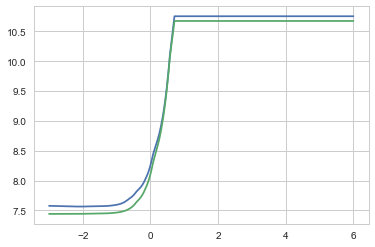

In [149]:
plt.plot(np.log10(alphalist),err_vec_test)
plt.plot(np.log10(alphalist),err_vec_train)

In [150]:
alphalist[np.argmin(err_vec_test)]

0.0080264335222571745

In [151]:
from sklearn.linear_model import lars_path

In [152]:
std = StandardScaler()
#std.fit(X_train.values.astype(float))
std.fit(X_train)

X_tr = std.transform(X_train)
X_te = std.transform(X_test)

In [153]:
## Note: lars_path takes numpy matrices, not pandas dataframes

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train.values, method='lasso', verbose=True)

Computing regularization path using the LARS ...
.

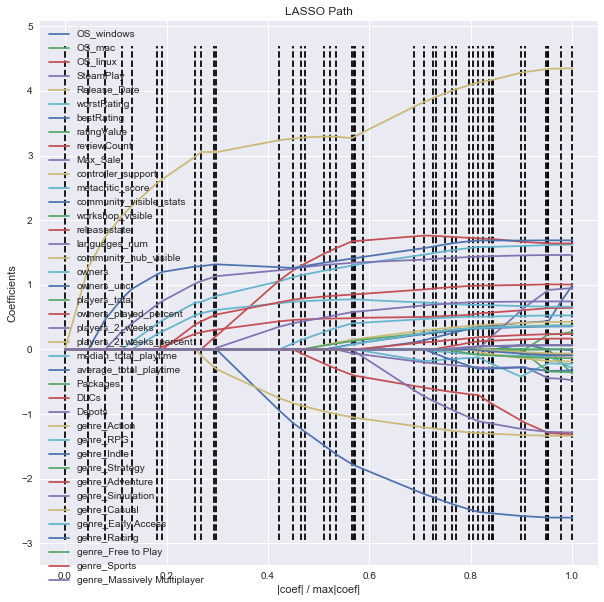

In [67]:
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
#plt.xscale('log')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()

In [68]:
('Release_Date', 2.4636264680982521e-09),
 ('worstRating', 0.0),
 ('bestRating', 0.0),
 ('ratingValue', 0.0),
 ('reviewCount', -4.9463835202127155e-05),
 ('Max_Sale', -0.0),
 ('controller_support', 0.0),
 ('metacritic_score', 0.0),
 ('community_visible_stats', 0.0),
 ('workshop_visible', 0.0),
 ('releasestate', 0.0),
 ('languages_num', 0.0),
 ('community_hub_visible', 0.0),
 ('owners', -5.2982003047128246e-06),
 ('owners_unc', 0.00036101977656871371),
 ('players_total', 2.4012249522986552e-06),
 ('owners_played_percent', 0.0),
 ('players_2_weeks', 2.5792114436099075e-05),

IndentationError: unexpected indent (<ipython-input-68-188f1d5dd718>, line 2)

## re-running Boosted Trees using only the more effective features:

In [ ]:
#only features with importances above 0.04
"""best_features = ['Release_Date',
       'ratingValue', 'Max_Sale',
       'languages_num',
       'players_total',
       'owners_played_percent', 'players_2_weeks_percent',
       'median_total_playtime', 'average_total_playtime', 'Packages', 'Depots']
"""
#best_features = ['Release_Date','ratingValue','metacritic_score']   

#as choosen by Lasso
best_features = ['Release_Date','reviewCount','owners','owners_unc','players_total','players_2_weeks']

y = df.loc[:,"Price"]
X = df.loc[:,best_features]
#Split the data 70-30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
len(X.columns)

In [ ]:
#try to tune this a little better (used the loops below)
gbmodel1 = GradientBoostingRegressor(subsample=0.85, learning_rate=0.12,\
            max_depth = 10,max_leaf_nodes=12,n_estimators=125,loss='huber',\
            min_samples_split=4 )
gbmodel1.fit(X_train,y_train)
gb1_test_pred = gbmodel1.predict(X_test)

print(r2_score(y_test, gb1_test_pred))

plt.scatter(y_test, rf1_test_pred,alpha=.15)

plt.plot(np.linspace(0,80,1000),np.linspace(0,80,1000));

## re-running Boosted Trees using only the more effective features:

In [ ]:
#only features with importances above 0.04
"""best_features = ['Release_Date',
       'ratingValue', 'Max_Sale',
       'languages_num',
       'players_total',
       'owners_played_percent', 'players_2_weeks_percent',
       'median_total_playtime', 'average_total_playtime', 'Packages', 'Depots']
"""
best_features = ['Release_Date','ratingValue','metacritic_score']   
#best_features = ['ratingValue','metacritic_score']  

#as choosen by Lasso
#best_features = ['Release_Date','reviewCount','owners','owners_unc','players_total','players_2_weeks']

y = df.loc[:,"Price"]
X = df.loc[:,best_features]
#Split the data 70-30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
len(X.columns)

In [ ]:
best_features = ['ratingValue','metacritic_score']   

y = df.loc[:,"Price"]
X = df.loc[:,best_features]
#Split the data 70-30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
len(X.columns)

gbmodel1 = GradientBoostingRegressor(subsample=0.8, learning_rate=.11,\
                max_depth = 10,max_leaf_nodes=7,n_estimators=200,loss='huber',\
                min_samples_split=4 )
gbmodel1.fit(X_train,y_train)
gb1_test_pred = gbmodel1.predict(X_test)

print(r2_score(y_test, gb1_test_pred))

plt.scatter(y_test, rf1_test_pred,alpha=.15)

plt.plot(np.linspace(0,60,1000),np.linspace(0,60,1000));

In [ ]:
best_features = ['Release_Date','ratingValue','metacritic_score']   

y = df.loc[:,"Price"]
X = df.loc[:,best_features]
#Split the data 70-30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
len(X.columns)

gbmodel1 = GradientBoostingRegressor(subsample=0.7, learning_rate=.05,\
                max_depth = 10,max_leaf_nodes=7,n_estimators=120,loss='huber',\
                min_samples_split=4 )
gbmodel1.fit(X_train,y_train)
gb1_test_pred = gbmodel1.predict(X_test)

print(r2_score(y_test, gb1_test_pred))

plt.scatter(y_test, rf1_test_pred,alpha=.15)

plt.plot(np.linspace(0,60,1000),np.linspace(0,60,1000));

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
best_features = ['Release_Date','ratingValue','metacritic_score']  

y = df.loc[:,"Price"]
X = df.loc[:,best_features]
#Split the data 70-30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

parameters = {'subsample':np.arange(.65,0.95,.05),
              'max_depth':[4,6,10],
              'learning_rate':np.arange(.001,.010,.001),
              'n_estimators':[180,200,250]}

model = GradientBoostingRegressor()
grid_search = GridSearchCV(model, parameters, n_jobs=-3, verbose=1)   #note n_jobs = -2 means all but one core
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
best_features = ['Release_Date','ratingValue','metacritic_score']   

y = df.loc[:,"Price"]
X = df.loc[:,best_features]
#Split the data 70-30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
len(X.columns)

gbmodel1 = GradientBoostingRegressor(subsample=0.7, learning_rate=.009,\
                max_depth = 4,max_leaf_nodes=7,n_estimators=250,\
                min_samples_split=2 )
gbmodel1.fit(X_train,y_train)
gb1_test_pred = gbmodel1.predict(X_test)

print(r2_score(y_test, gb1_test_pred))

plt.figure(figsize=(8,8))
plt.scatter(y_test, rf1_test_pred,alpha=.2)

plt.xlabel("Test Data")
plt.ylabel("Predicted by Model")
plt.title("Predicting Price by 3 Obvious variables\nUsing a Gradient Boosted Tree Algorithm\nTuned by GridSearchCV")
plt.plot(np.linspace(0,60,1000),np.linspace(0,60,1000));